# **Brain Tumor MRI Image Classification**

## **Project Type**- Classification

## **Contribution** - Individual

## **Name** - Janani Ravi

# **Project Summary**

# **GitHub Link** - [Click here](https://github.com/Jan2309jr/Brain-Tumor-MRI-Image-Classification.git)

# **Problem Statement**

This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.

# **1. Understanding my Dataset**

## Importing Libraries

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D, Input)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, MobileNetV2, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

2025-07-23 08:54:52.677899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753260892.876465      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753260892.931340      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading the dataset

In [8]:
#Cloning My Repo to Access the Dataset
!git clone https://github.com/Jan2309jr/Brain-Tumor-MRI-Image-Classification.git

Cloning into 'Brain-Tumor-MRI-Image-Classification'...
remote: Enumerating objects: 2504, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 2504 (delta 12), reused 5 (delta 5), pack-reused 2483 (from 2)
Receiving objects: 100% (2504/2504), 77.02 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [9]:
# Navigate to the dataset directory
base_path = 'Brain-Tumor-MRI-Image-Classification/brain-tumor-dataset'
train_path = 'Brain-Tumor-MRI-Image-Classification/brain-tumor-dataset/train'
test_path = 'Brain-Tumor-MRI-Image-Classification/brain-tumor-dataset/test'
valid_path = 'Brain-Tumor-MRI-Image-Classification/brain-tumor-dataset/valid'

## Checking Dataset Structure

In [10]:
# Check if the path exists and list contents
if os.path.exists(base_path):
    print("Dataset structure:")
    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep) # Checks the dept of the tree
        indent = ' ' * 2 * level #to display the levels using identation
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 2 * (level + 1)
        for file in files[:3]:  # Show only first 3 files per directory
             print(f'{subindent}{file}')
        if len(files) > 3:
             print(f'{subindent}... and {len(files)} more file')
else:
     print("Dataset path not found!")

Dataset structure:
brain-tumor-dataset/
  test/
    _classes.csv
    meningioma/
      Tr-me_0403_jpg.rf.f5dc0942037bc6516f6ab30cfb858714.jpg
      Tr-me_0293_jpg.rf.a352c8addd6322dbfd61239afa553cbf.jpg
      Tr-me_0418_jpg.rf.82a12b3c3b1fcbbb1f68980cee935db0.jpg
      ... and 63 more file
    glioma/
      Tr-gl_0400_jpg.rf.333b6def3021f57a2faebc5b0a5445a7.jpg
      Tr-gl_0094_jpg.rf.1c0f0e197cfcf7728469ebc07bc6db14.jpg
      Tr-gl_0032_jpg.rf.e1e485b4f909d84c8e24cd26e0ad3c08.jpg
      ... and 80 more file
    pituitary/
      Tr-pi_0382_jpg.rf.a330dc0c62193d9c1b7842764d588ca2.jpg
      Tr-pi_0562_jpg.rf.b7d629887a6dc9b22011837fafad9948.jpg
      Tr-pi_0229_jpg.rf.ae7d37ef9124e20a24089069410e9230.jpg
      ... and 54 more file
    no_tumor/
      Tr-no_0139_jpg.rf.51497327a9205e13b0b0477b6743efff.jpg
      Tr-no_0527_jpg.rf.7aae6c5ee63cc6099c51e3bc8c11ba28.jpg
      Tr-no_0533_jpg.rf.acf2150cc93395e975eccb2fce3d0a4c.jpg
      ... and 49 more file
  valid/
    _classes.csv
    meningio

## First View of dataset


Sample Images from Training Set


/tmp/ipykernel_36/2801537332.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,n,k+1)


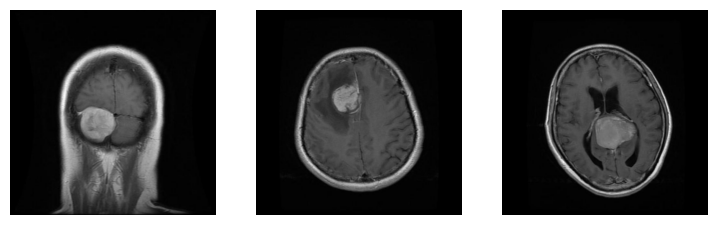

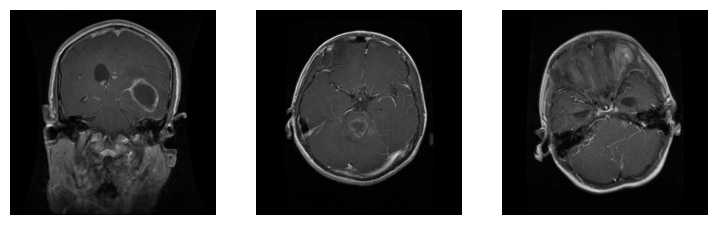

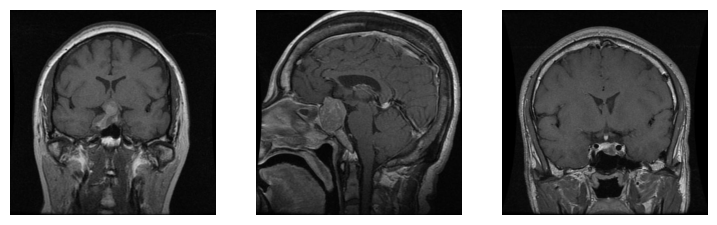

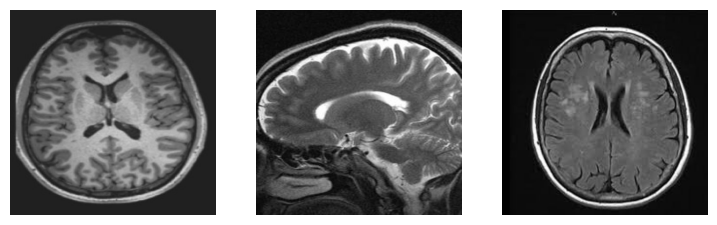


Sample Images from Testing Set


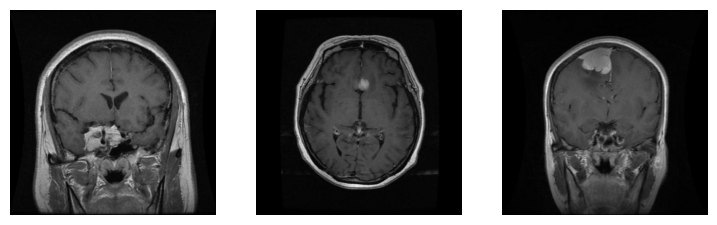

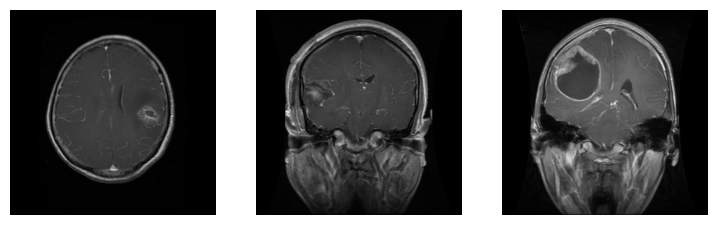

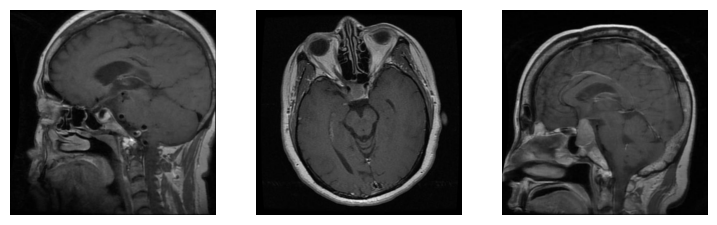

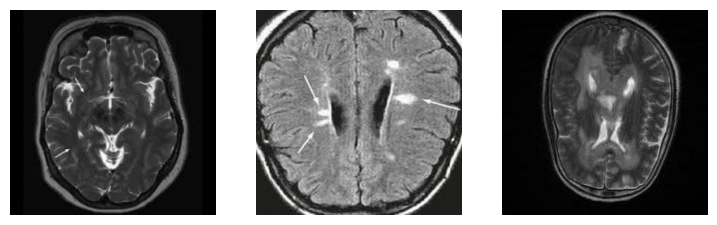


Sample Images from Valid Set


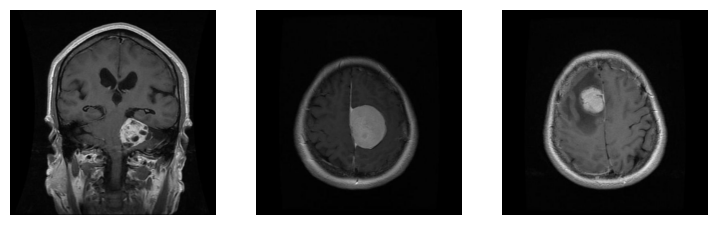

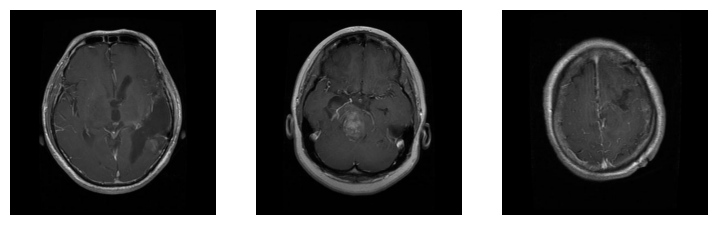

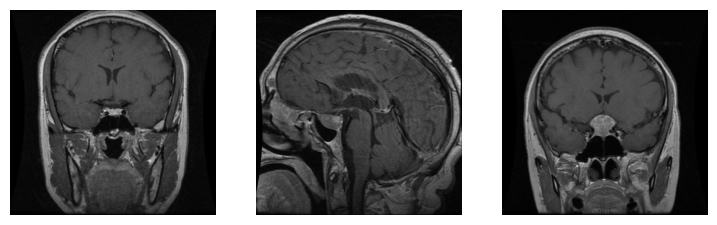

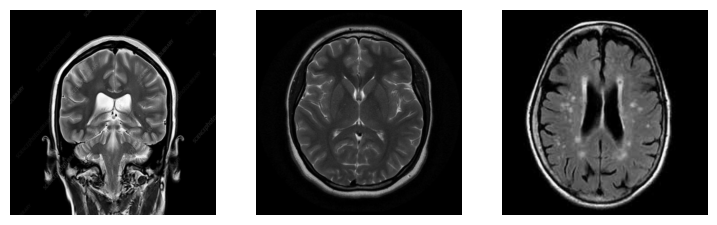

In [11]:
# # First view of dataset
def show_sample_images(data_path,n=3):
    for i in os.listdir(data_path):
        cat_path=os.path.join(data_path,i)
        if(os.path.isdir(cat_path)):
            images=os.listdir(cat_path)[:3]
            plt.figure(figsize=(n*3,3))
            plt.title(f'Sample Images from {i}')
            plt.axis('off')
            for k,j in enumerate(images):
                img=Image.open(os.path.join(cat_path,j))
                plt.subplot(1,n,k+1)
                plt.imshow(img)
                plt.axis('off')
            plt.show()
print("\nSample Images from Training Set")
show_sample_images(train_path)
print("\nSample Images from Testing Set")
show_sample_images(test_path)
print("\nSample Images from Valid Set")
show_sample_images(valid_path)

## Dataset count in each category

In [12]:
def count_dataset(data_path):
    print(f"The dataset has {len(os.listdir(data_path))} folders: {os.listdir(data_path)} \n")
    print("-----------")
    for i in os.listdir(data_path):
        count_cat=0;
        print(f"{i} folder :-")
        if(os.path.isdir(os.path.join(data_path,i))):
            for j in os.listdir(os.path.join(data_path,i)):
                if(os.path.isdir(os.path.join(data_path,i,j))):
                    count_cat+=1
                    print(f"{j} : {len(os.listdir(os.path.join(data_path,i,j)))}")
        print("-----------")


count_dataset(base_path)

The dataset has 3 folders: ['test', 'valid', 'train'] 

-----------
test folder :-
meningioma : 63
glioma : 80
pituitary : 54
no_tumor : 49
-----------
valid folder :-
meningioma : 124
glioma : 161
pituitary : 118
no_tumor : 99
-----------
train folder :-
meningioma : 358
glioma : 564
pituitary : 438
no_tumor : 335
-----------


## Checking class imbalance visually in Training set

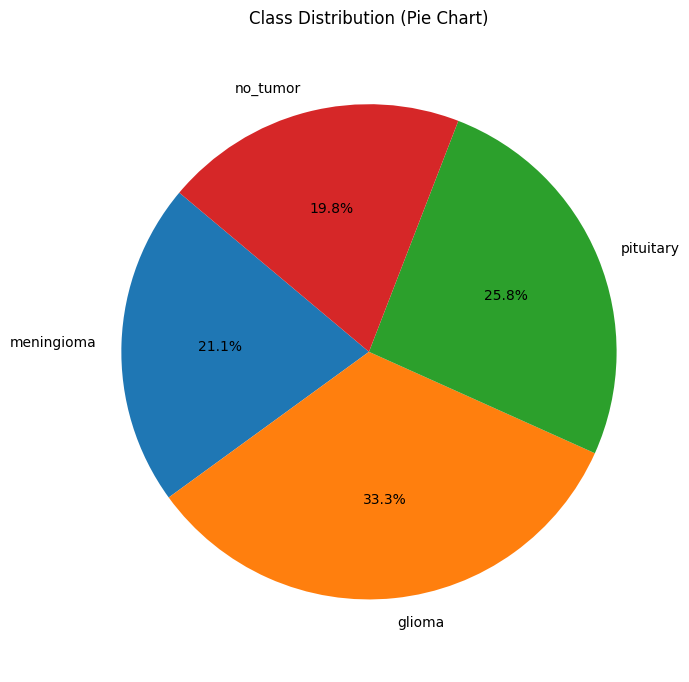

In [13]:
def class_distribution(data_path):
    class_count = {}

    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            class_count[class_name] = len(image_files)

    # Prepare data for pie chart
    labels = [*class_count.keys()]
    sizes = [*class_count.values()]

    # Plot pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140 )
    plt.title("Class Distribution (Pie Chart)")
    plt.axis('equal')  # Equal aspect ratio makes it a circle
    plt.tight_layout()
    plt.show()
class_distribution(train_path)

## Image resolution consistency


Unique Image Resolutions:
(640, 640): 1695 images


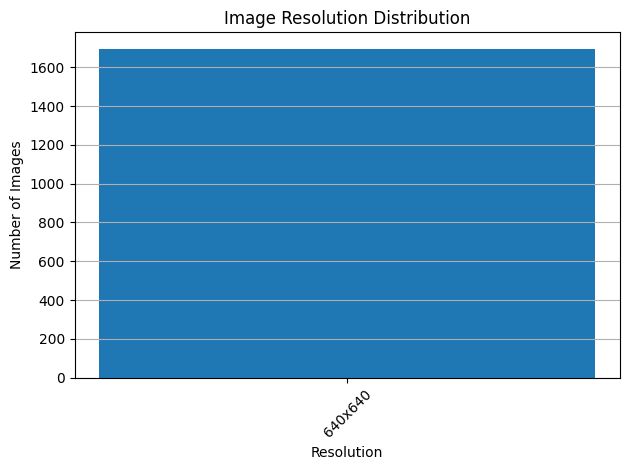

In [14]:
def check_image_resolutions(data_path):
    resolutions = {}

    for folder in os.listdir(data_path):
        path = os.path.join(data_path, folder)
        if not os.path.isdir(path):
            continue

        for file in os.listdir(path):
            try:
                img = Image.open(os.path.join(path, file))
                size = img.size  # (width, height)
                resolutions[size] = resolutions.get(size, 0) + 1
            except:
                print(f"Error reading {file}")

    print("\nUnique Image Resolutions:")
    for res, count in sorted(resolutions.items(), key=lambda x: -x[1]):
        print(f"{res}: {count} images")

    # Plot
    if resolutions:
        labels = [f"{w}x{h}" for (w, h) in resolutions.keys()]
        values = values = [v for v in resolutions.values()]

        plt.bar(labels, values)
        plt.title("Image Resolution Distribution")
        plt.xlabel("Resolution")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
check_image_resolutions(train_path)

## Exploratory Data Analysis

### Univariant Analysis

#### 1. Training Set Class Distribution Bar Graph

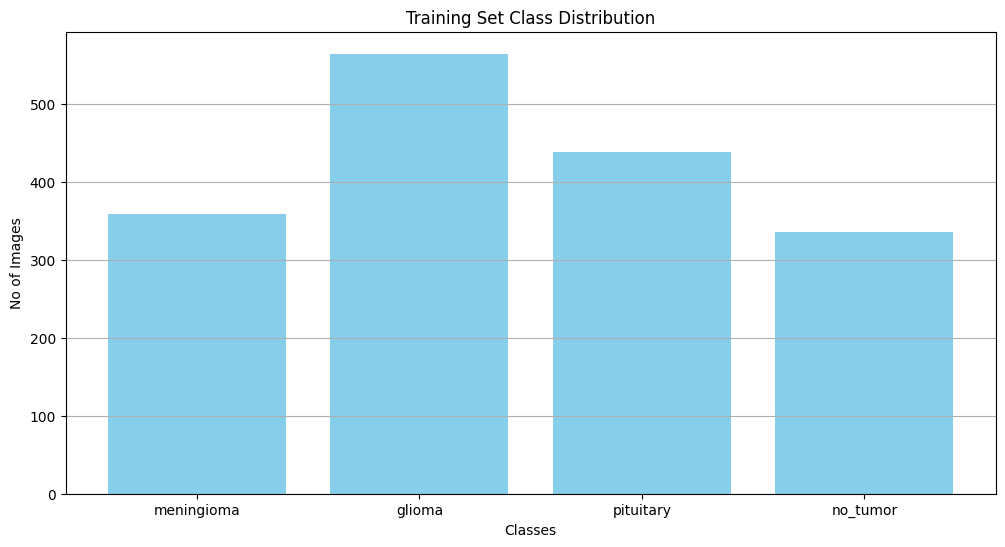

In [15]:
list1=[]
count=[]
for i in os.listdir(train_path):
    if(os.path.isdir(os.path.join(train_path,i))):
        list1.append(i)
        count.append(len(os.listdir(os.path.join(train_path,i))))
plt.figure(figsize=(12,6))
plt.bar(list1,count,color="skyblue")
plt.title("Training Set Class Distribution")
plt.ylabel("No of Images")
plt.xlabel("Classes")
plt.grid(axis='y')
plt.show()

#### 2. Test Set Class Distribution Bar Graph

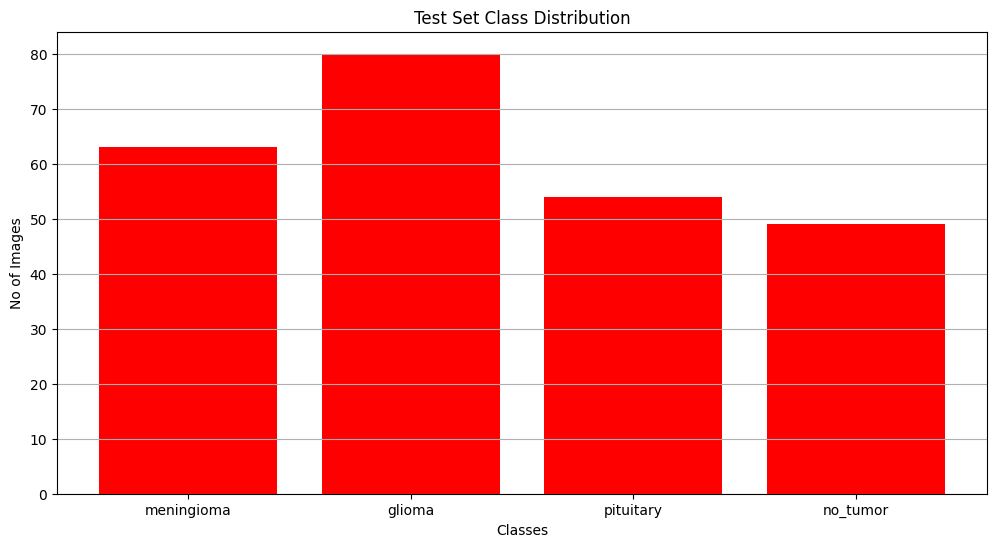

In [16]:
list2=[]
count=[]
for i in os.listdir(test_path):
    if(os.path.isdir(os.path.join(test_path,i))):
        list2.append(i)
        count.append(len(os.listdir(os.path.join(test_path,i))))
plt.figure(figsize=(12,6))
plt.bar(list2,count,color="red")
plt.title("Test Set Class Distribution")
plt.ylabel("No of Images")
plt.xlabel("Classes")
plt.grid(axis='y')
plt.show()

#### 3. Valid Set Class Distribution Bar Graph

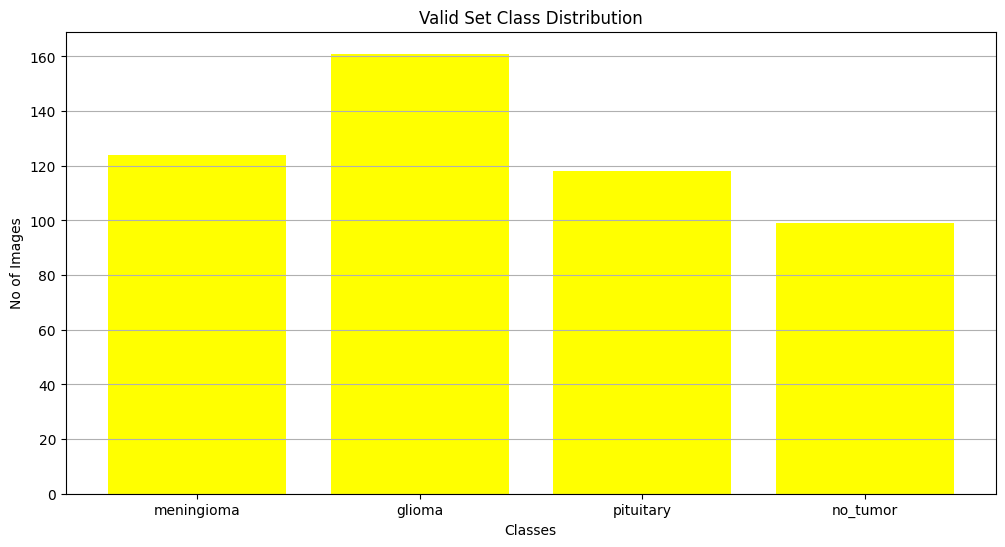

In [17]:
list3=[]
count=[]
for i in os.listdir(valid_path):
    if(os.path.isdir(os.path.join(valid_path,i))):
        list3.append(i)
        count.append(len(os.listdir(os.path.join(valid_path,i))))
plt.figure(figsize=(12,6))
plt.bar(list3,count,color="yellow")
plt.title("Valid Set Class Distribution")
plt.ylabel("No of Images")
plt.xlabel("Classes")
plt.grid(axis='y')
plt.show()

#### 4. Image Resolution Consistency Bar Graph

##### i. Training set


Unique Image Resolutions:
(640, 640): 1695 images


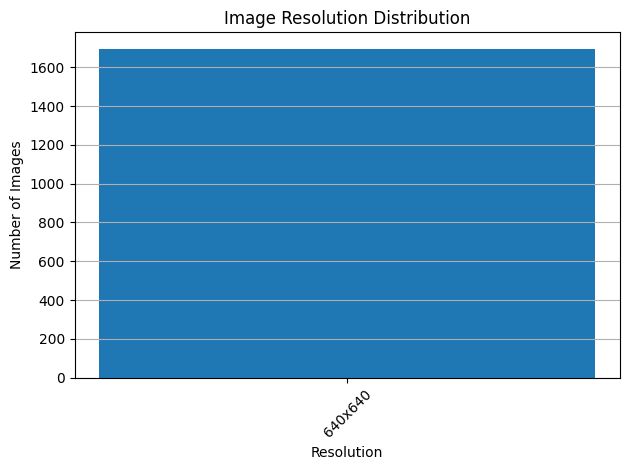

In [18]:
check_image_resolutions(train_path)

##### ii. Testing set


Unique Image Resolutions:
(640, 640): 246 images


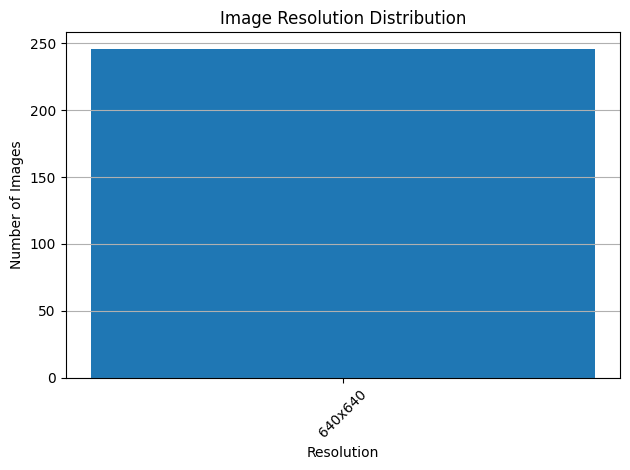

In [19]:
check_image_resolutions(test_path)

#### 3. Brightness distribution Histogram

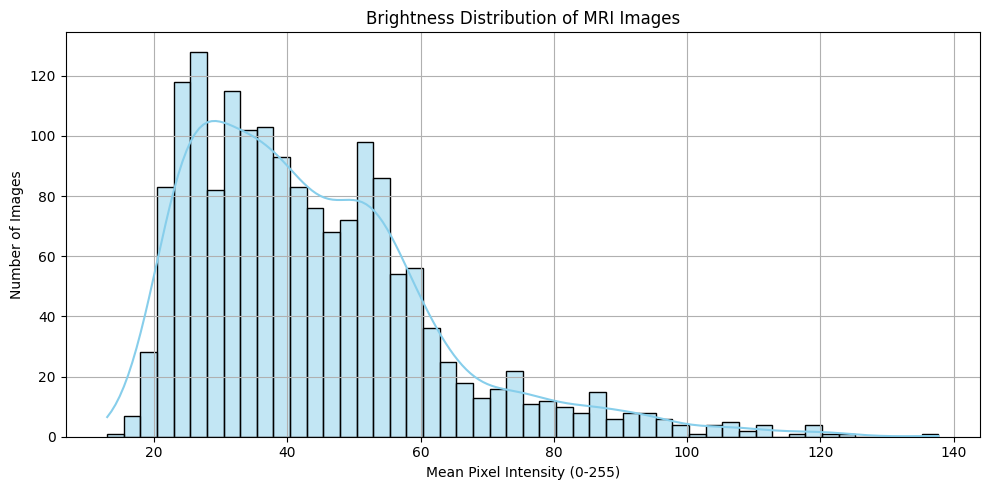

In [20]:
def brightness_dist(data_path):
    brightness_list = []
    warnings.filterwarnings("ignore", category=FutureWarning)

    for i in os.listdir(data_path):
        if os.path.isdir(os.path.join(data_path, i)):
            for j in os.listdir(os.path.join(data_path, i)):
                img = os.path.join(data_path, i, j)
                image = Image.open(img).convert("L")
                img_pix_list = np.array(image)
                mean_brightness = np.mean(img_pix_list)
                brightness_list.append(mean_brightness)

    plt.figure(figsize=(10, 5))
    sns.histplot(brightness_list, bins=50, color='skyblue', kde=True)
    plt.title("Brightness Distribution of MRI Images")
    plt.xlabel("Mean Pixel Intensity (0-255)")
    plt.ylabel("Number of Images")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
brightness_dist(train_path)

#### 4. Pixel Intensity Histogram

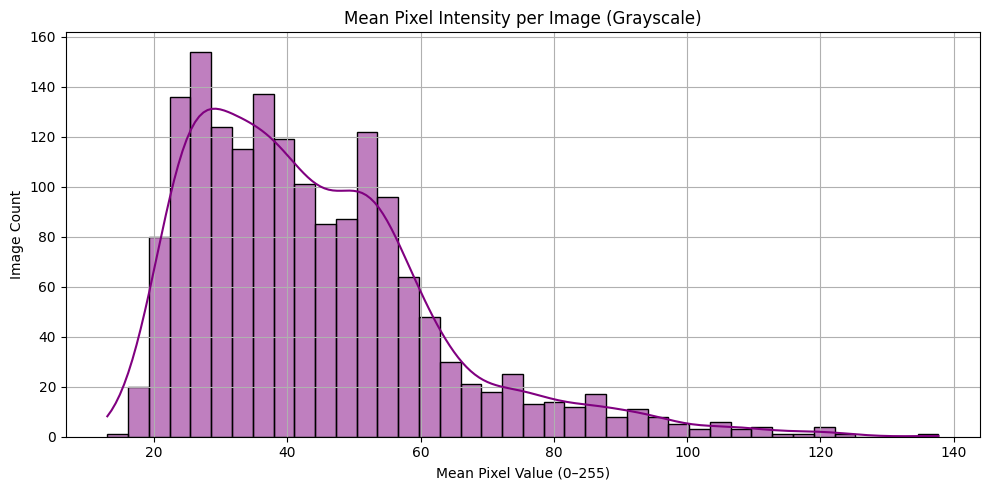

In [21]:
def pixel_intensity_per_image(data_path):
    mean_pixel_values = []

    for class_folder in os.listdir(data_path):
        class_path = os.path.join(data_path, class_folder)
        if not os.path.isdir(class_path): continue

        for image_file in os.listdir(class_path):
            try:
                image_path = os.path.join(class_path, image_file)
                img = Image.open(image_path).convert("L")
                img_arr = np.array(img)
                mean_pixel_values.append(np.mean(img_arr))
            except:
                continue

    plt.figure(figsize=(10, 5))
    sns.histplot(mean_pixel_values, bins=40, kde=True, color="purple")
    plt.title("Mean Pixel Intensity per Image (Grayscale)")
    plt.xlabel("Mean Pixel Value (0–255)")
    plt.ylabel("Image Count")
    plt.tight_layout()
    plt.grid(True)
    plt.show()
pixel_intensity_per_image(train_path)

### Bivariant Analysis

#### 5. Class Count across Folders

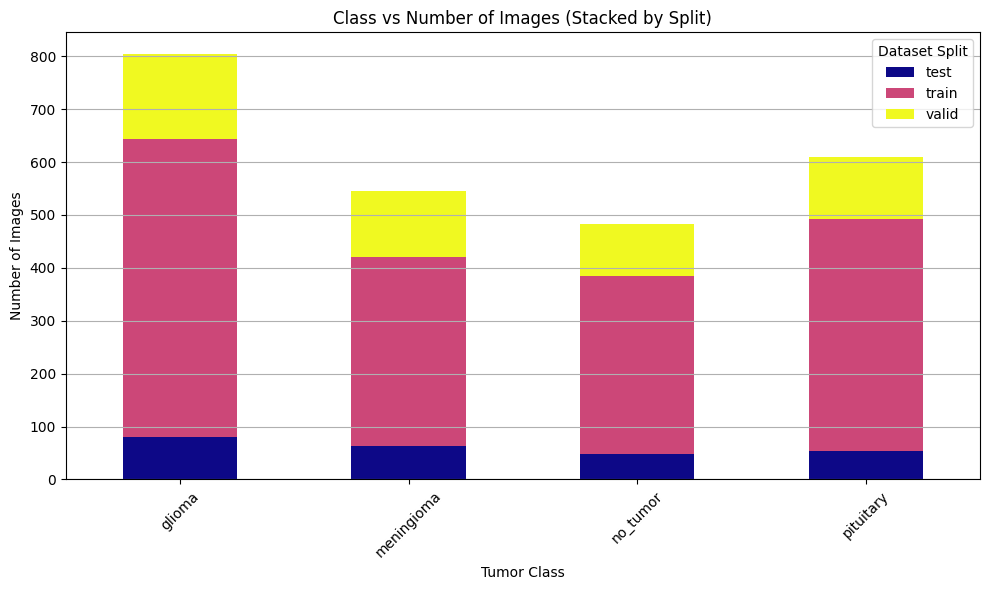

In [22]:
data = []

# Loop through splits and classes
for split in ["train", "valid", "test"]:
    split_path = os.path.join(base_path, split)
    if not os.path.exists(split_path): continue
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path): continue
        num_images = len(os.listdir(cls_path))
        data.append({"Class": cls, "Split": split, "ImageCount": num_images})

# Convert to DataFrame
df = pd.DataFrame(data)

# Pivot to wide format for stacked bar
pivot_df = df.pivot(index="Class", columns="Split", values="ImageCount").fillna(0)

# Plot stacked bar
pivot_df.plot(kind="bar", stacked=True, figsize=(10,6), colormap='plasma')
plt.title("Class vs Number of Images (Stacked by Split)")
plt.xlabel("Tumor Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Dataset Split")
plt.tight_layout()
plt.show()

#### 6. Class VS Pixel Intensity Boxplot

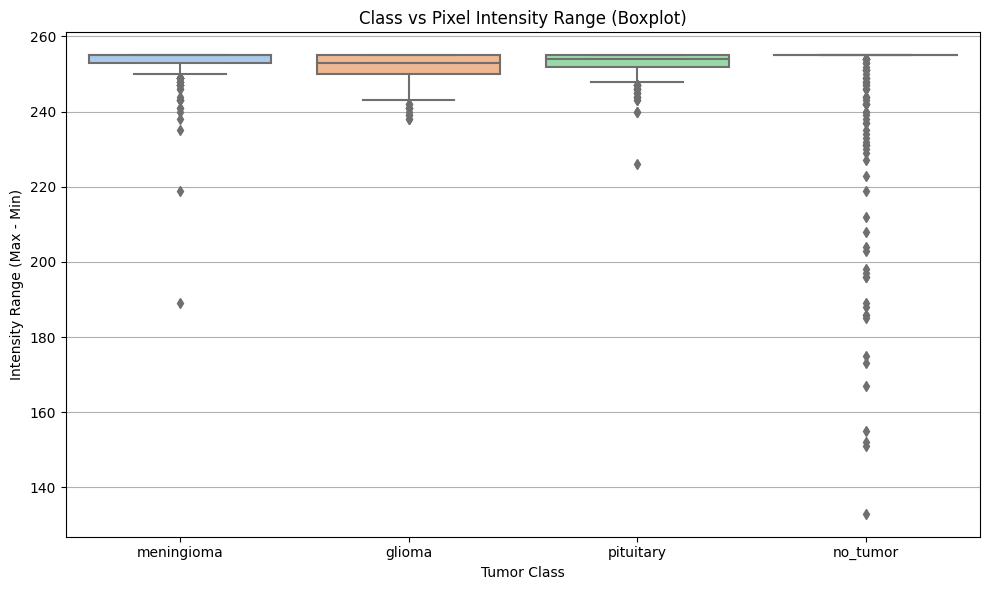

In [23]:
# Build DataFrame with intensity range
data = []
for i in os.listdir(train_path):
    if (os.path.isdir(os.path.join(train_path,i))):
        for j in os.listdir(os.path.join(train_path,i)):
            img=os.path.join(train_path,i,j)
            image=Image.open(img).convert("L")
            img_list=np.array(image)
            intensity_range=np.max(img_list)-np.min(img_list)
            data.append({"class": i, "intensity_range": intensity_range})

df = pd.DataFrame(data)

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='intensity_range', data=df, palette='pastel')
plt.title("Class vs Pixel Intensity Range (Boxplot)")
plt.ylabel("Intensity Range (Max - Min)")
plt.xlabel("Tumor Class")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 7. Class VS brigthness historgram

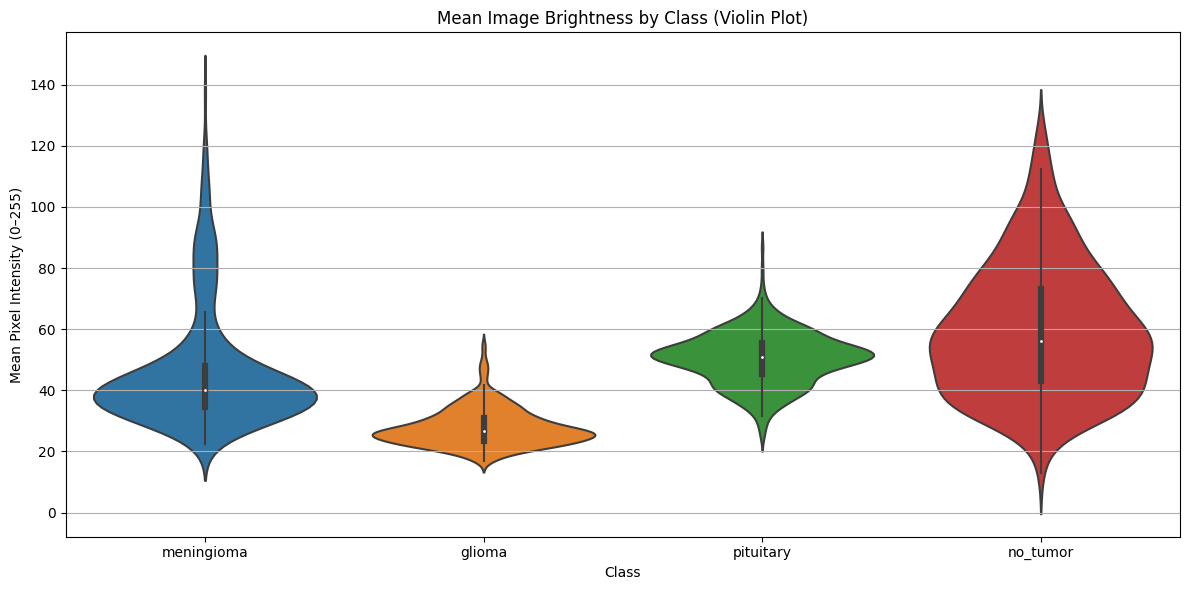

In [24]:
def class_vs_brightness_violin(data_path):
    records = []
    warnings.filterwarnings("ignore", category=FutureWarning)

    # Collect brightness data with class labels
    for class_name in os.listdir(data_path):
        class_folder = os.path.join(data_path, class_name)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                try:
                    image = Image.open(img_path).convert("L")
                    img_pix = np.array(image)
                    mean_brightness = np.mean(img_pix)
                    records.append({"Class": class_name, "Brightness": mean_brightness})
                except Exception as e:
                    continue

    # Create DataFrame for plotting
    df = pd.DataFrame(records)

    # Violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="Class", y="Brightness", data=df, inner="box", scale="width")
    plt.title("Mean Image Brightness by Class (Violin Plot)")
    plt.xlabel("Class")
    plt.ylabel("Mean Pixel Intensity (0–255)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
class_vs_brightness_violin(train_path)

#### 8. Feature Correlation Heatmap

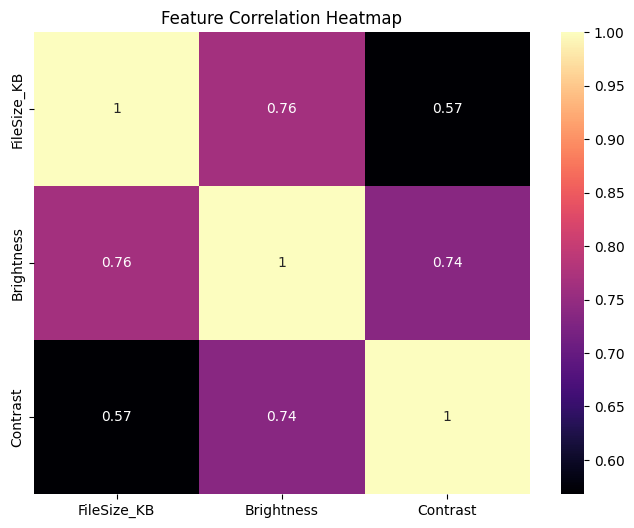

In [25]:
def build_feature_df(data_path):
    records = []
    for class_name in os.listdir(data_path):
        class_folder = os.path.join(data_path, class_name)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                try:
                    image = Image.open(img_path).convert('L')
                    img_array = np.array(image)
                    width, height = image.size
                    file_size_kb = os.path.getsize(img_path)/1024
                    mean_brightness = np.mean(img_array)
                    contrast = np.std(img_array)
                    records.append({
                        'Class': class_name,
                        'Width': width,
                        'Height': height,
                        'FileSize_KB': file_size_kb,
                        'Brightness': mean_brightness,
                        'Contrast': contrast
                    })
                except Exception:
                    continue
    return pd.DataFrame(records)

# Build DataFrame from all images in the dataset
df = build_feature_df(train_path)
# Compute and plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['FileSize_KB', 'Brightness', 'Contrast']].corr(), annot=True , cmap="magma")
plt.title("Feature Correlation Heatmap")
plt.show()


# **2. Data Augmentation**

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,             # Normalize pixel values
    rotation_range=20,            # Random rotation (±20 degrees)
    width_shift_range=0.2,        # Horizontal shift up to 20%
    height_shift_range=0.2,       # Vertical shift up to 20%
    zoom_range=0.2,               # Zoom in/out by 20%
    shear_range=0.15,             # Shear intensity
    horizontal_flip=True,         # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # Brightness adjustment
    fill_mode='nearest'           # Fill strategy
)

# **3. Creating Data Generators**

In [27]:
# Set seeds
np.random.seed(42)
tf.random.set_seed(42)
img_size = (224, 224)
batch_size = 32
class_names = sorted(os.listdir(train_path))  # auto fetch class folders

valid_test_datagen = ImageDataGenerator(rescale=1. / 255)

print("Creating Data Generators...")
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=True,
    seed=42
)
valid_generator = valid_test_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)
test_generator = valid_test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names,
    shuffle=False
)

print(f"Data Generators Created:")
print(f"-Training samples: {train_generator.samples}")
print(f"-Validation samples: {valid_generator.samples}")
print(f"-Test samples: {test_generator.samples}")
print(f"-Image size: {img_size}")
print(f"-Batch size: {batch_size}")
print(f"-Classes: {train_generator.class_indices}")

Creating Data Generators...
Found 1695 images belonging to 5 classes.
Found 502 images belonging to 5 classes.
Found 246 images belonging to 5 classes.
Data Generators Created:
-Training samples: 1695
-Validation samples: 502
-Test samples: 246
-Image size: (224, 224)
-Batch size: 32
-Classes: {'_classes.csv': 0, 'glioma': 1, 'meningioma': 2, 'no_tumor': 3, 'pituitary': 4}


# **4. Model Building**

## Designing Convolutional Neural Network (CNN)


In [28]:
CNN_model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), padding='same', input_shape=(*img_size, 3),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Block 3
    Conv2D(128, (3, 3), padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully connected layers
    Flatten(),
    Dense(256,kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation='softmax',kernel_regularizer=l2(0.001))

])

# Compile model
CNN_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Print model summary
CNN_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753260938.492210      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,786,821 (98.37 MB)

 Trainable params: 25,785,861 (98.37 MB)

 Non-trainable params: 960 (3.75 KB)

# 5. Transfer Learning

In [29]:
def build_transfer_model(base_model_name="ResNet50",
                         input_shape=(224, 224, 3),
                         num_classes=train_generator.num_classes,
                         freeze_all=True,
                         fine_tune_at=None,
                         learning_rate=0.0001):

    # 1. Select base model
    base_model_dict = {
        "ResNet50": ResNet50,
        "MobileNetV2": MobileNetV2,
        "InceptionV3": InceptionV3,
        "EfficientNetB0": EfficientNetB0
    }

    if base_model_name not in base_model_dict:
        raise ValueError(f"Unsupported model name: {base_model_name}. Choose from {list(base_model_dict.keys())}")

    base_model = base_model_dict[base_model_name](
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )

    # 2. Freeze or fine-tune layers
    if freeze_all:
        base_model.trainable = False
    elif fine_tune_at:
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False
        for layer in base_model.layers[fine_tune_at:]:
            layer.trainable = True
    else:
        base_model.trainable = True  # Fine-tune all layers

    # 3. Add custom head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256,kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax',kernel_regularizer=l2(0.001))(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    # 4. Compile
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

## 1. EfficientNetB0

In [ ]:
# Building EfficientNetB0 model
EfficientNetB0_model = build_transfer_model(
    base_model_name="EfficientNetB0",
    input_shape=(224, 224, 3),
    num_classes=train_generator.num_classes,
    freeze_all=True  # Freeze base initially

)

# Print summary
EfficientNetB0_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Non-trainable params: 4,050,083 (15.45 MB)

## 2. InceptionV3

In [ ]:
# Building InceptionV3 model
InceptionV3_model = build_transfer_model(
    base_model_name="InceptionV3",
    input_shape=(224, 224, 3),
    num_classes=train_generator.num_classes,
    freeze_all=True  # Freeze base initially
)
# Print summary
InceptionV3_model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation_5[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_6[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 54, 54,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d_3[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_8[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 52, 52,    │          0 │ batch_normalizat

## 3. ResNet50

In [32]:
# Building InceptionV3 model
ResNet50_model = build_transfer_model(
    base_model_name="ResNet50",
    input_shape=(224, 224, 3),
    num_classes=train_generator.num_classes,
    freeze_all=True  # Freeze base initially
)
# Print summary
ResNet50_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Non-trainable params: 23,588,224 (89.98 MB)

# 6. Model Training

## 1. Training Model

In [33]:
def train_model(model, model_name, train_generator, valid_generator, epochs=30):
    print(f"\n Training model: {model_name}")

    # Extract class labels from generator
    y_train_labels = train_generator.classes

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train_labels),
        y=y_train_labels
    )
    class_weights = dict(enumerate(class_weights))

    # Define callbacks
    checkpoint = ModelCheckpoint(f"{model_name}_best_model.h5",
                                 monitor='val_loss',
                                 save_best_only=True,
                                 verbose=1)
    early_stop = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[early_stop, checkpoint]
    )
    return history


In [34]:
labels = []
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        count = len(os.listdir(folder_path))
        labels.extend([folder] * count)

print(Counter(labels))


Counter({'glioma': 564, 'pituitary': 438, 'meningioma': 358, 'no_tumor': 335})


In [35]:
warnings.filterwarnings("ignore", category=UserWarning)
# Train custom CNN
cnn_history = train_model(CNN_model, "CustomCNN", train_generator, valid_generator)
# Train EfficientNetB0
effnet_history = train_model(EfficientNetB0_model, "EfficientNetB0", train_generator, valid_generator)
# Train InceptionV3
inception_history = train_model(InceptionV3_model, "InceptionV3", train_generator, valid_generator)
# Train ResNet50
resnet_history = train_model(ResNet50_model, "ResNet50", train_generator, valid_generator)


 Training model: CustomCNN
Epoch 1/30


I0000 00:00:1753260960.697213     148 service.cc:148] XLA service 0x78f254007e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753260960.698212     148 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753260961.371100     148 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/53 ━━━━━━━━━━━━━━━━━━━━ 11:10 13s/step - accuracy: 0.2812 - loss: 2.8556

I0000 00:00:1753260968.140933     148 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5031 - loss: 2.2827
Epoch 1: val_loss improved from inf to 2.74614, saving model to CustomCNN_best_model.h5
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 585ms/step - accuracy: 0.5037 - loss: 2.2808 - val_accuracy: 0.2351 - val_loss: 2.7461
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5917 - loss: 1.8938
Epoch 2: val_loss did not improve from 2.74614
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 422ms/step - accuracy: 0.5917 - loss: 1.8944 - val_accuracy: 0.2351 - val_loss: 3.0483
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6200 - loss: 1.8107
Epoch 3: val_loss did not improve from 2.74614
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 420ms/step - accuracy: 0.6200 - loss: 1.8114 - val_accuracy: 0.2351 - val_loss: 3.0540
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.5928 - loss: 1.8881
Epoch 4: val_loss did not improve from 2.74614
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 430ms/step - accuracy: 0.5933 - loss: 1.8869 - val_ac

# 7. Model Evaluation

## 1. Visualizing Accuracy and Loss

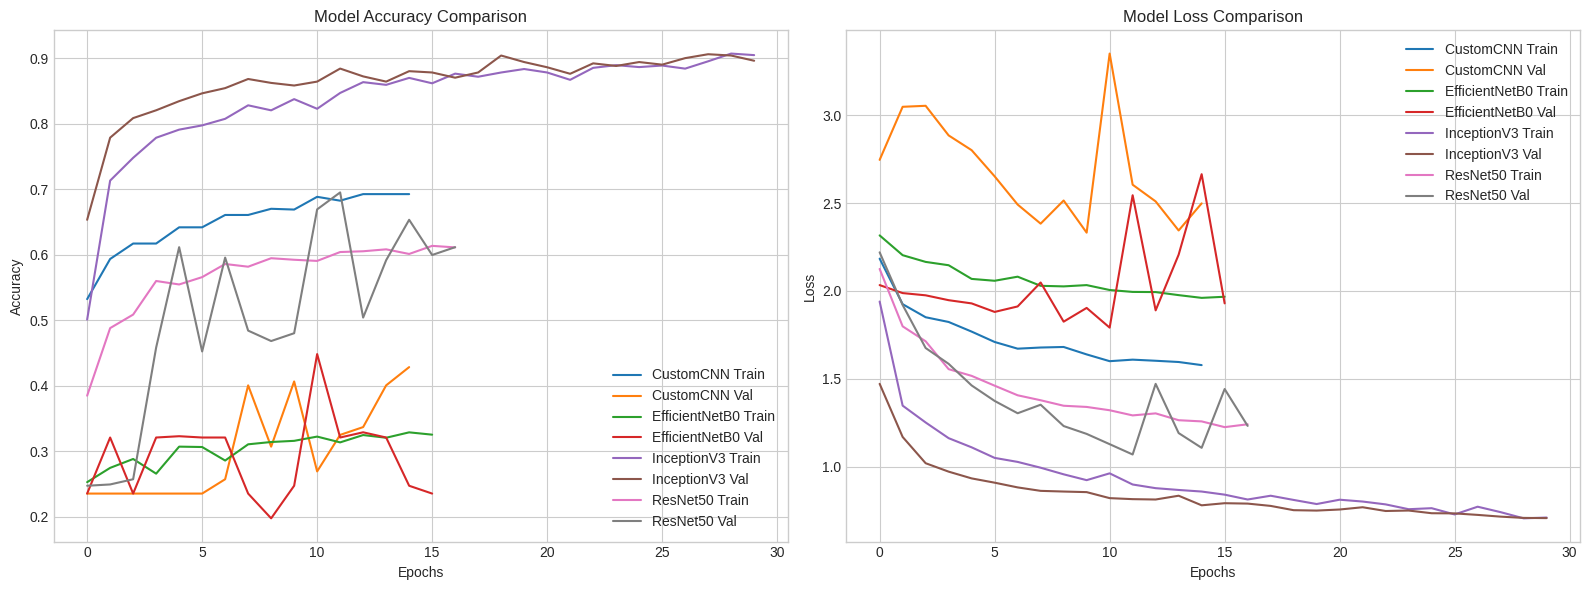

In [ ]:
# Set figure size and style
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(16, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CustomCNN Train')
plt.plot(cnn_history.history['val_accuracy'], label='CustomCNN Val')

plt.plot(effnet_history.history['accuracy'], label='EfficientNetB0 Train')
plt.plot(effnet_history.history['val_accuracy'], label='EfficientNetB0 Val')

plt.plot(inception_history.history['accuracy'], label='InceptionV3 Train')
plt.plot(inception_history.history['val_accuracy'], label='InceptionV3 Val')

plt.plot(resnet_history.history['accuracy'], label='ResNet50 Train')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 Val')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CustomCNN Train')
plt.plot(cnn_history.history['val_loss'], label='CustomCNN Val')

plt.plot(effnet_history.history['loss'], label='EfficientNetB0 Train')
plt.plot(effnet_history.history['val_loss'], label='EfficientNetB0 Val')

plt.plot(inception_history.history['loss'], label='InceptionV3 Train')
plt.plot(inception_history.history['val_loss'], label='InceptionV3 Val')

plt.plot(resnet_history.history['loss'], label='ResNet50 Train')
plt.plot(resnet_history.history['val_loss'], label='ResNet50 Val')

plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 2. Evaluating Model Using :

* Accuracy Score
* Precision Score
* Recall Score
* F1 Score
* Confusion Matrix

# 8. Model Comparison

## 1.  Evaluating Each Model Based on the Test Set

In [46]:
# Helper function to evaluate a model
def evaluate_model(model, model_name, test_generator):
    # Predict probabilities
    preds = model.predict(test_generator)
    
    # Get class predictions
    y_pred = np.argmax(preds, axis=1)
    
    # True labels
    y_true = test_generator.classes
    
    # Class names
    class_labels = ['glioma','pituitary','meningioma','no_tumor']
    
    # Evaluation metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Print metrics
    print(f"----- {model_name} Evaluation -----")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    return {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1
}

### CustomCNN

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
----- CustomCNN Evaluation -----
Accuracy:  0.3943
Precision: 0.4153
Recall:    0.3943
F1 Score:  0.2784

Classification Report:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        80
   pituitary       0.32      0.92      0.47        63
  meningioma       1.00      0.04      0.08        49
    no_tumor       0.62      0.69      0.65        54

    accuracy                           0.39       246
   macro avg       0.48      0.41      0.30       246
weighted avg       0.42      0.39      0.28       246



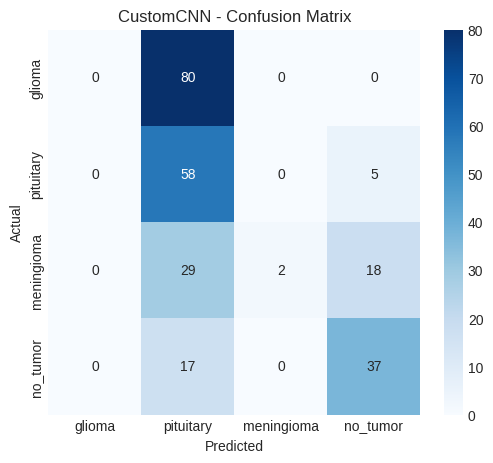

In [47]:
cnn_eval=evaluate_model(CNN_model, "CustomCNN", test_generator)

### EfficientNetB0

8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
----- EfficientNetB0 Evaluation -----
Accuracy:  0.4593
Precision: 0.2642
Recall:    0.4593
F1 Score:  0.3213

Classification Report:
              precision    recall  f1-score   support

      glioma       0.41      1.00      0.58        80
   pituitary       0.00      0.00      0.00        63
  meningioma       0.66      0.67      0.67        49
    no_tumor       0.00      0.00      0.00        54

    accuracy                           0.46       246
   macro avg       0.27      0.42      0.31       246
weighted avg       0.26      0.46      0.32       246



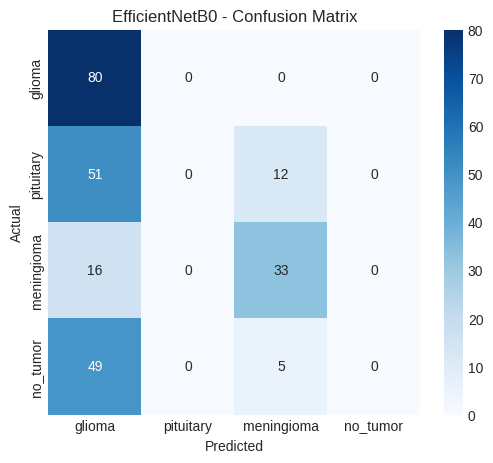

In [48]:
eff_eval=evaluate_model(EfficientNetB0_model, "EfficientNetB0", test_generator)

### InceptionV3

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 923ms/step
----- InceptionV3 Evaluation -----
Accuracy:  0.8740
Precision: 0.8733
Recall:    0.8740
F1 Score:  0.8709

Classification Report:
              precision    recall  f1-score   support

      glioma       0.89      0.95      0.92        80
   pituitary       0.83      0.71      0.77        63
  meningioma       0.91      0.84      0.87        49
    no_tumor       0.85      0.98      0.91        54

    accuracy                           0.87       246
   macro avg       0.87      0.87      0.87       246
weighted avg       0.87      0.87      0.87       246



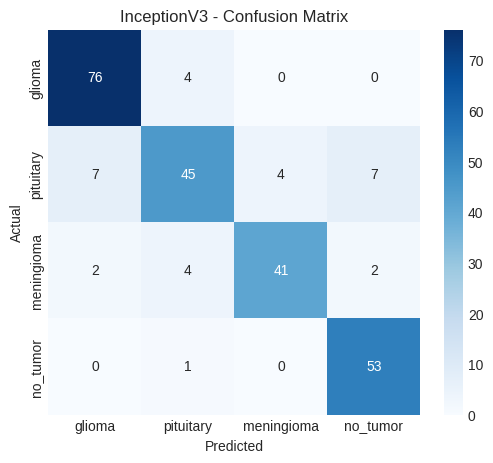

In [49]:
incep_eval=evaluate_model(InceptionV3_model, "InceptionV3", test_generator)

### ResNet50

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 652ms/step
----- ResNet50 Evaluation -----
Accuracy:  0.6626
Precision: 0.6837
Recall:    0.6626
F1 Score:  0.6448

Classification Report:
              precision    recall  f1-score   support

      glioma       0.76      0.70      0.73        80
   pituitary       0.69      0.32      0.43        63
  meningioma       0.70      0.76      0.73        49
    no_tumor       0.56      0.93      0.69        54

    accuracy                           0.66       246
   macro avg       0.68      0.67      0.65       246
weighted avg       0.68      0.66      0.64       246



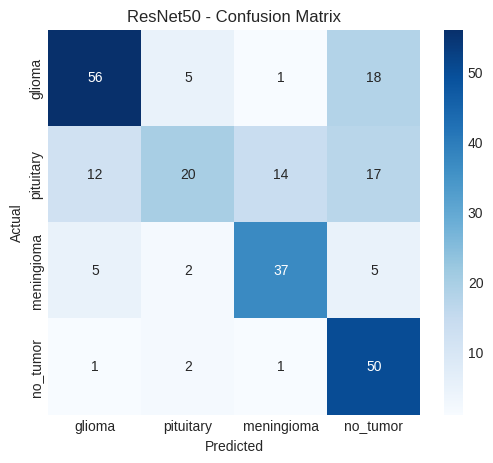

In [50]:
rest_eval=evaluate_model(ResNet50_model, "ResNet50", test_generator)

## 2. Metric Summary (Comparing All Models)

In [51]:
results_df = pd.DataFrame({
    "CNN": cnn_eval,
    "EfficientNetB0" : eff_eval,
    "InceptionV3" : incep_eval,
    "RestNet50" : rest_eval
    })
results_df=results_df.T
results_df.index.name = "Model"
results_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
CNN,0.394309,0.415279,0.394309,0.278385
EfficientNetB0,0.459350,0.264199,0.459350,0.321315
InceptionV3,0.873984,0.873314,0.873984,0.870927
RestNet50,0.662602,0.683725,0.662602,0.644805


## 3. Visualization of the Comparison

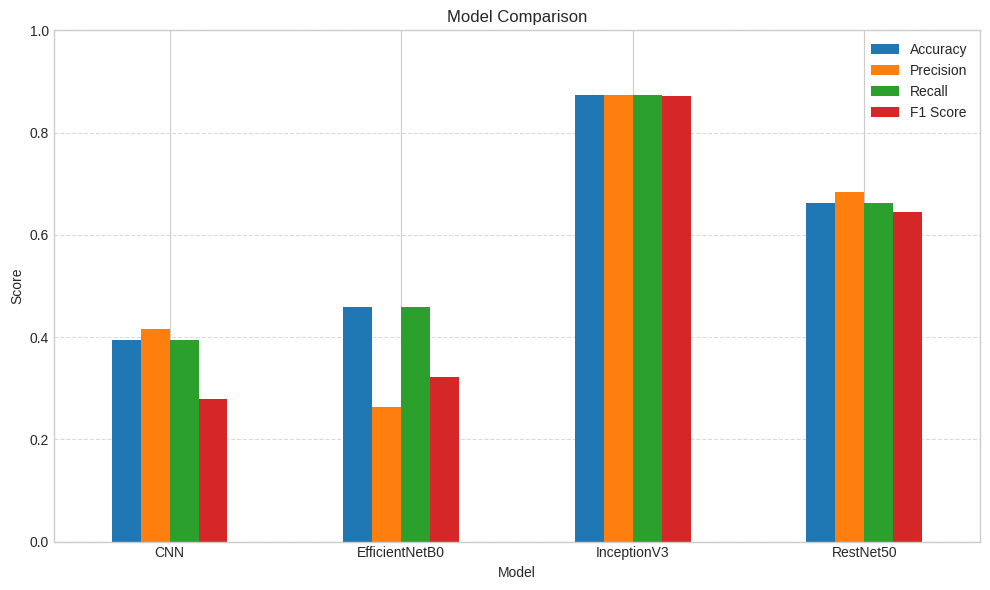

In [52]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # Because scores are between 0 and 1
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 9. Saving the Model

## 1. Saving InceptionV3 Model

In [53]:
# Save the model in HDF5 format
InceptionV3_model.save("brain_tumor_InceptionV3_model.h5")

## 2. Saving Class Labels

In [58]:
with open("tumor_labels.txt", "w") as f:
    for label in class_names:
        f.write(f"{label}\n")